In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
boston = pd.read_csv('boston_marathon_yearly.csv', index_col=0)
chicago = pd.read_csv('chicago_marathon_yearly.csv', index_col=0)
olympic = pd.read_csv('olympic_marathon_records.csv', index_col=0)

In [2]:
olympic

NameError: name 'olympic' is not defined

In [141]:
boston = boston.rename(columns = {'상위500위_평균_기록': '평균_기록'})
chicago = chicago.rename(columns = {'상위500위_평균_기록': '평균_기록'})

In [142]:
b_and_c = pd.concat([boston, chicago])

In [5]:
b_and_c['기온X습도'] = b_and_c['기온'] * b_and_c['습도']

In [6]:
df = pd.concat([boston, chicago, olympic])

In [112]:
#plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'AppleGothic'

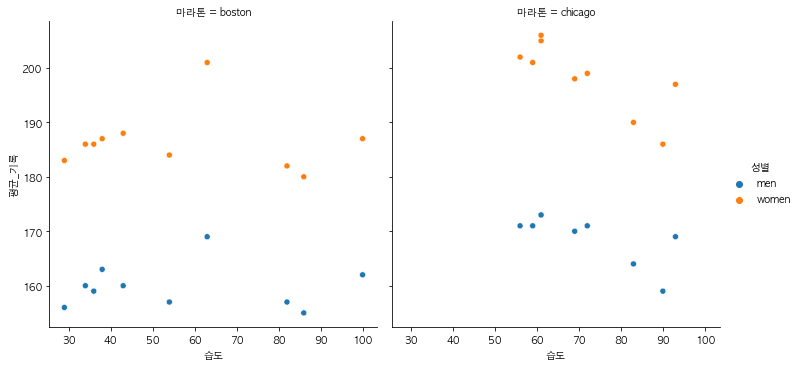

In [10]:
sns.relplot(x="습도", y="평균_기록", hue="성별", col="마라톤", data=b_and_c)
plt.show()

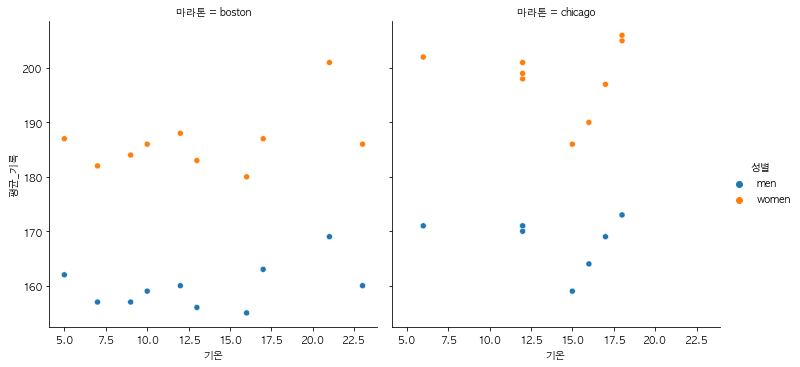

In [11]:
sns.relplot(x="기온", y="평균_기록", hue="성별", col="마라톤", data=b_and_c)
plt.show()

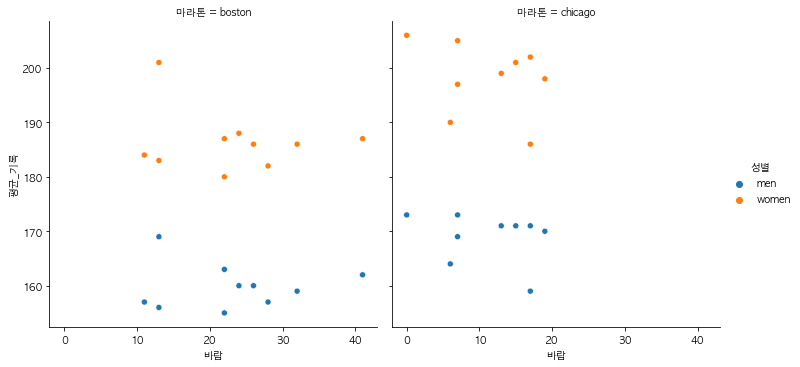

In [12]:
sns.relplot(x="바람", y="평균_기록", hue="성별", col="마라톤", data=b_and_c)
plt.show()

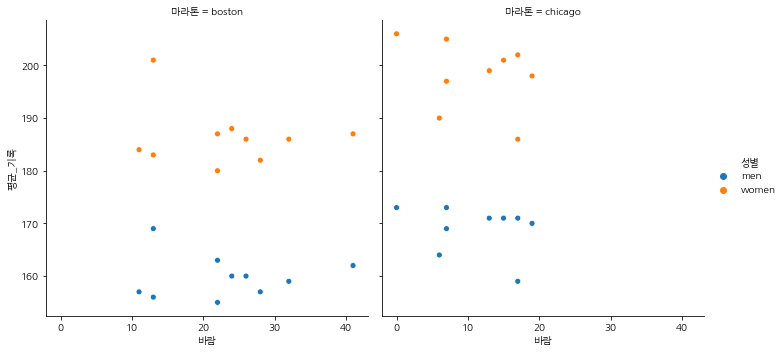

In [78]:
sns.relplot(x="바람", y="평균_기록", hue="성별", col="마라톤", data=b_and_c)
plt.show()

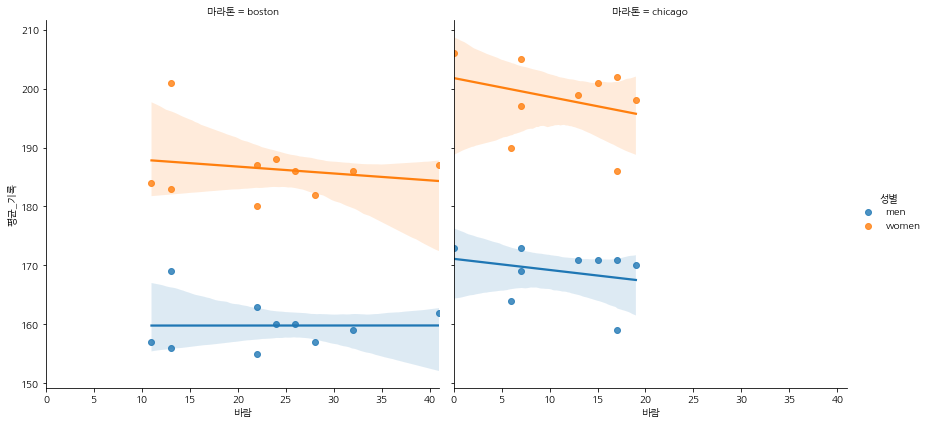

In [79]:
sns.lmplot(x='바람', y='평균_기록', hue='성별', col='마라톤', col_wrap=2, height=6, data=b_and_c)
plt.show()

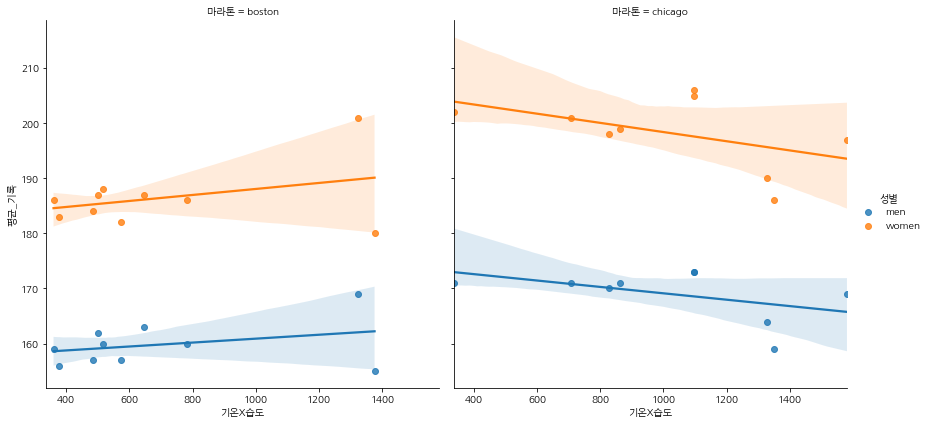

In [84]:
sns.lmplot(x='기온X습도', y='평균_기록', hue='성별', col='마라톤', height=6, data=b_and_c)
plt.show()

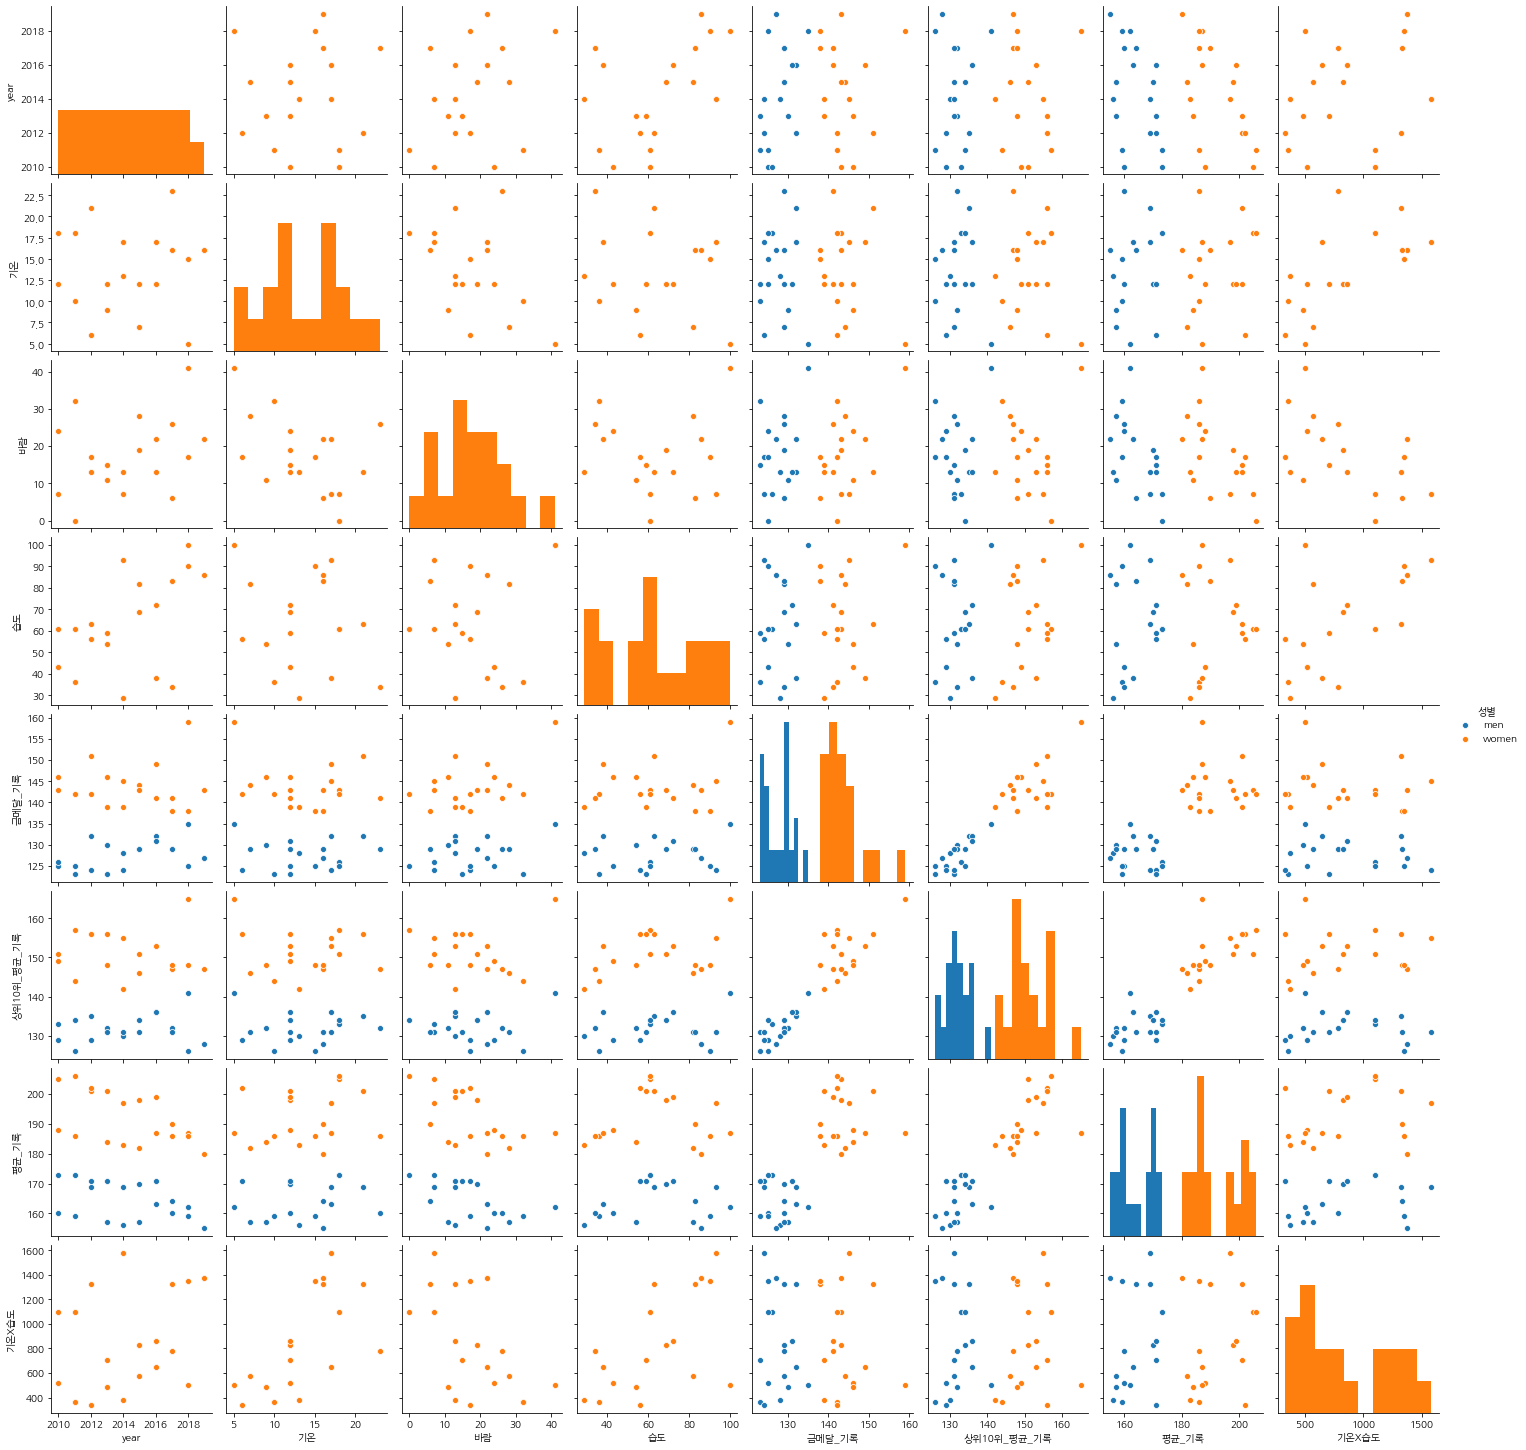

In [74]:
sns.pairplot(b_and_c, hue="성별", diag_kind='hist')
plt.show()

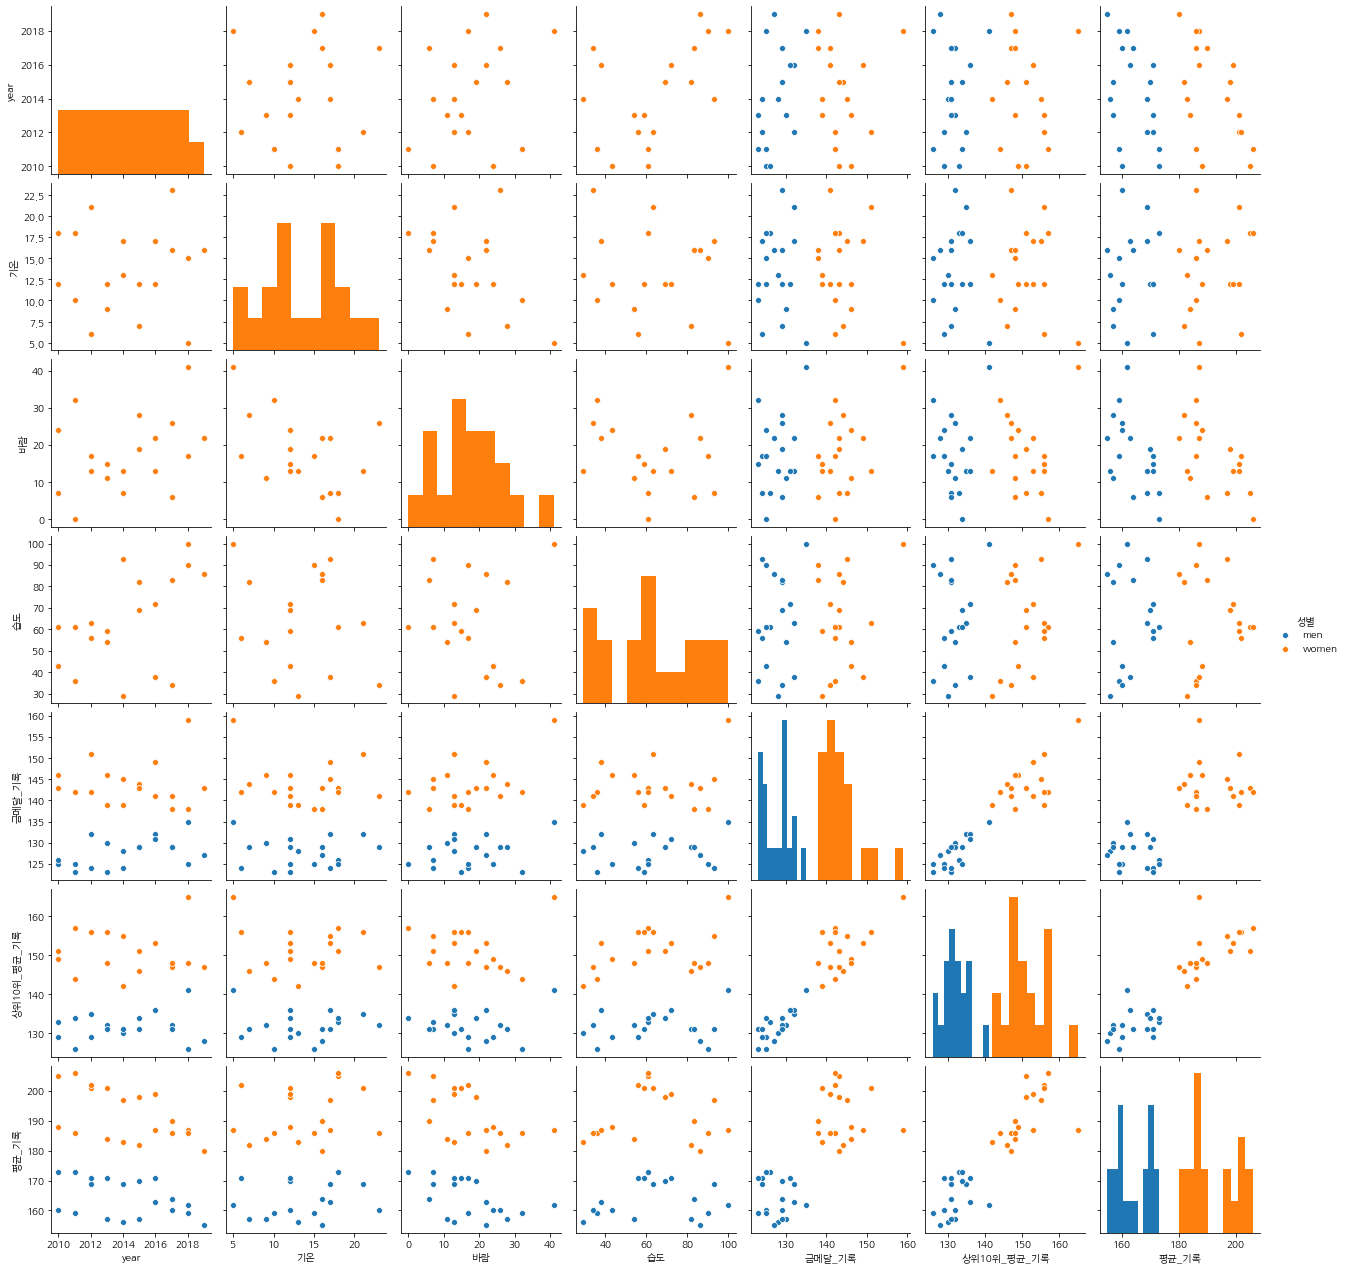

In [58]:
sns.pairplot(b_and_c, hue="성별", diag_kind='hist')
plt.show()

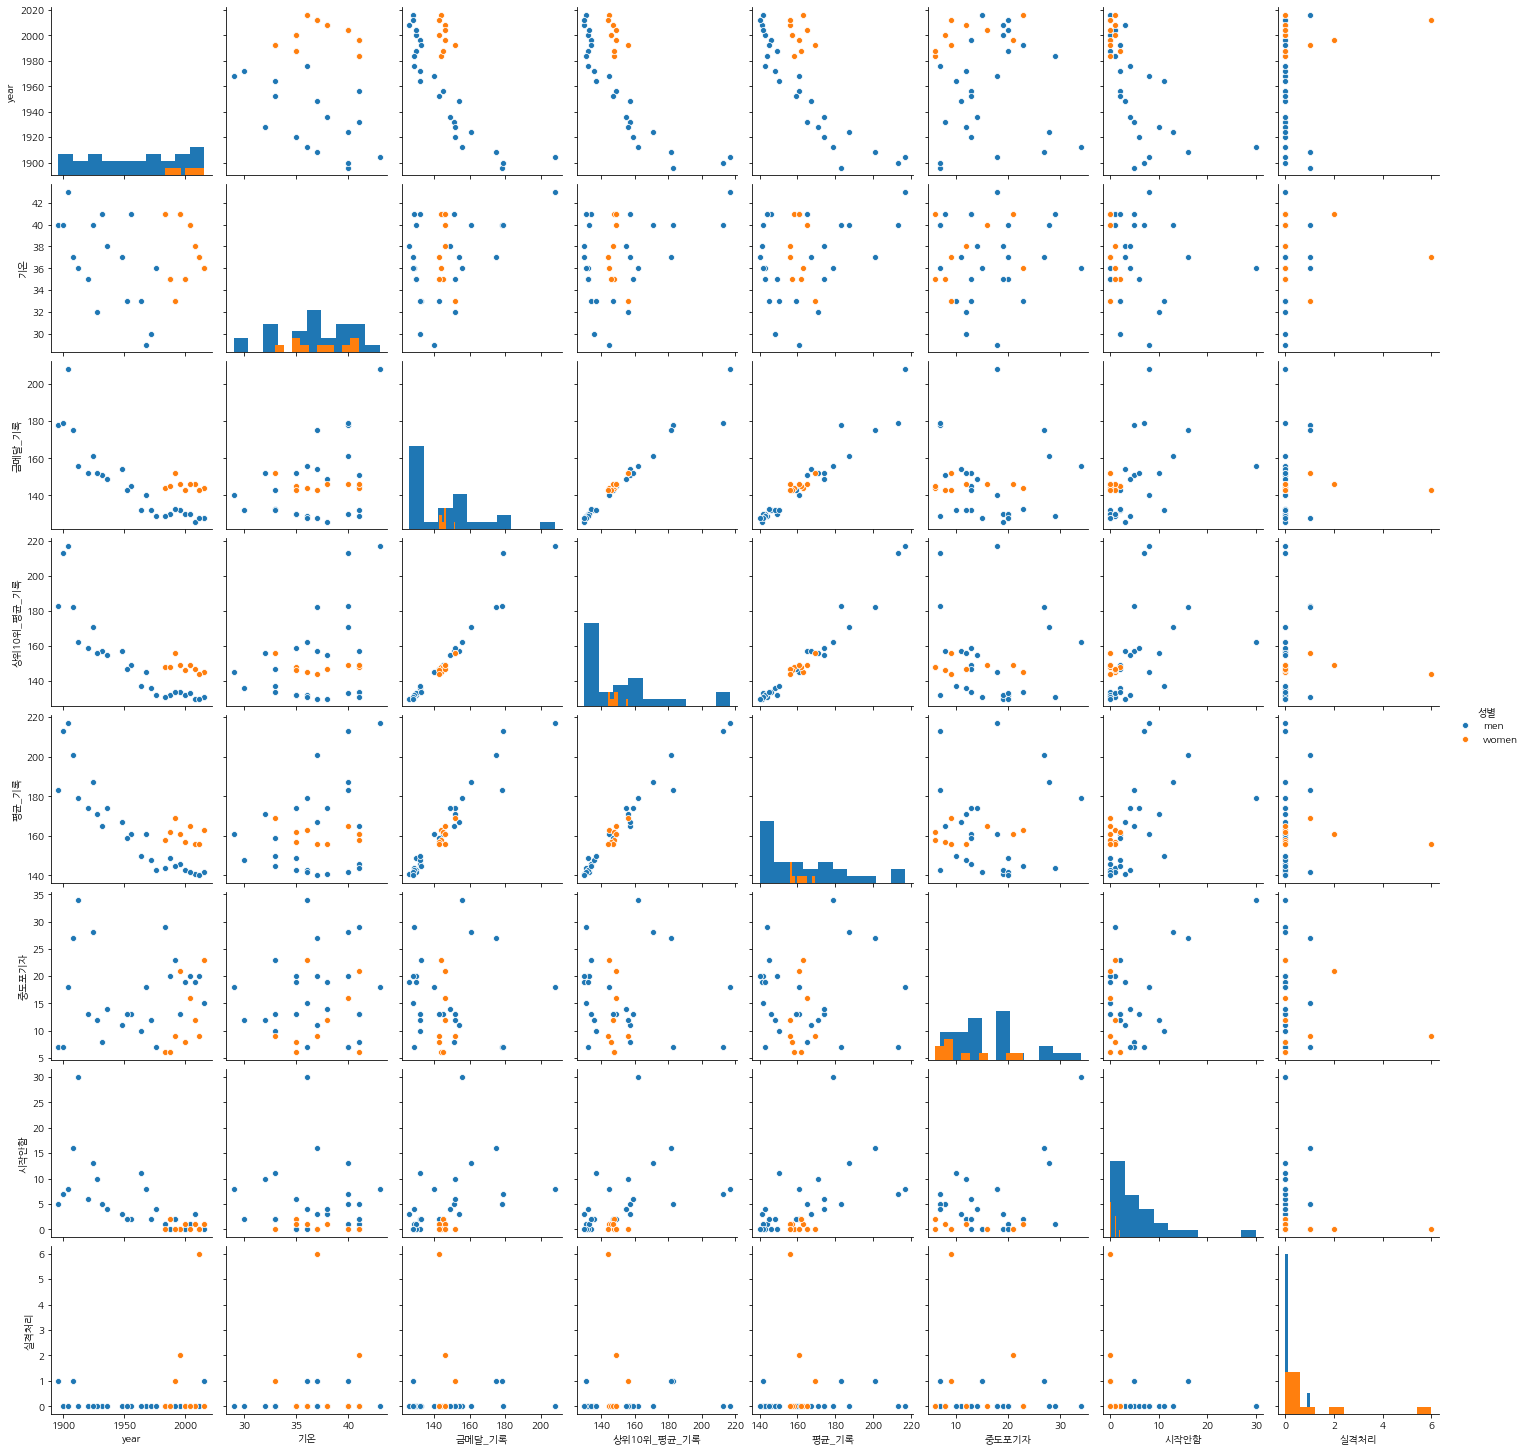

In [66]:
sns.pairplot(olympic, hue="성별", diag_kind='hist')
plt.show()

In [4]:
# 개인 선수별 분석

In [201]:
boston = pd.read_csv('boston_marathon_individual.csv', index_col=0)
chicago = pd.read_csv('chicago_marathon_individual.csv', index_col=0)
olympic = pd.read_csv('olympic_marathon_results.csv', index_col=0)

In [203]:
olympic_yearly = pd.read_csv('olympic_marathon_records.csv')

In [204]:
olympic['year_re'] = [year[-4:] for year in olympic['year']]

In [205]:
olympic = olympic.astype({'year_re':'int64'})

In [206]:
olympic_yearly = olympic_yearly.rename(columns={'year':'year_re'})

In [207]:
olympic_yearly = olympic_yearly[['year_re', '기온']]

In [208]:
olympic = pd.merge(olympic, olympic_yearly, on='year_re', how='left')

In [209]:
olympic_fin = olympic[olympic['time'] != 'None']

In [210]:
olympic_fin['time'] = pd.to_datetime(olympic_fin['time'])

In [211]:
olympic_fin['time'] = [x.time() for x in olympic_fin['time'] ]

In [212]:
olympic_fin = olympic_fin.reset_index()

In [213]:
for i in range(len(olympic_fin)):
    minute = olympic_fin.loc[i, 'time'].hour * 60 + olympic_fin.loc[i, 'time'].minute
    olympic_fin.loc[i, 'minutes'] = minute

In [218]:
olympic_fin['Latitude (average)'] = [abs(lat) for lat in olympic_fin['Latitude (average)']]

In [247]:
olympic_fin_temp = pd.pivot_table(olympic_fin, values='minutes', index=['기온', 'Latitude (average)', 'gender', 'year_re'], aggfunc=np.mean,).reset_index()

In [252]:
olympic_fin_temp_1950 = olympic_fin_temp[olympic_fin_temp['year_re']>1950]

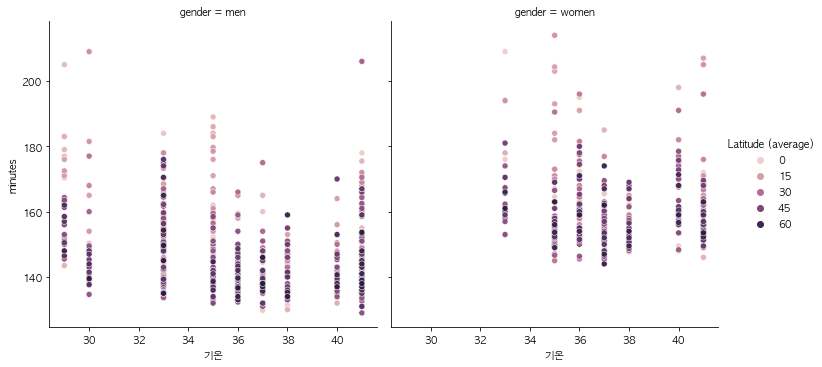

In [253]:
sns.relplot(x="기온", y="minutes", hue="Latitude (average)", col="gender", data=olympic_fin_temp_1950)
plt.show()

In [220]:
boston_yearly = pd.read_csv('boston_marathon_yearly.csv', index_col=0)
chicago_yearly = pd.read_csv('chicago_marathon_yearly.csv', index_col=0)

In [221]:
boston = pd.merge(boston, boston_yearly, on='year', how='left')
chicago = pd.merge(chicago, chicago_yearly, on='year', how='left')

In [222]:
boston['Latitude (average)'] = [abs(lat) for lat in boston['Latitude (average)']]

In [223]:
boston['OfficialTime'] = pd.to_datetime(boston['OfficialTime'])

In [224]:
boston['OfficialTime'] = [x.time() for x in boston['OfficialTime'] ]

In [225]:
for i in range(len(boston)):
    minute = boston.loc[i, 'OfficialTime'].hour * 60 + boston.loc[i, 'OfficialTime'].minute
    boston.loc[i, 'minutes'] = minute

In [238]:
boston_temp = pd.pivot_table(boston, values='minutes', index=['기온', 'Latitude (average)', 'gender'], aggfunc=np.mean,).reset_index()

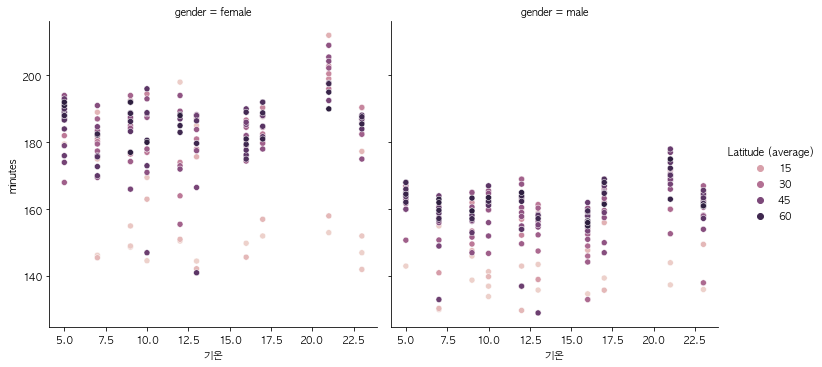

In [239]:
sns.relplot(x="기온", y="minutes", hue="Latitude (average)", col="gender", data=boston_temp)
plt.show()

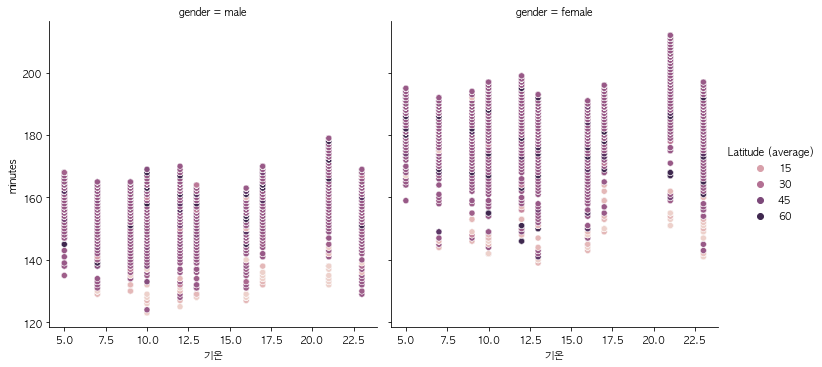

In [226]:
sns.relplot(x="기온", y="minutes", hue="Latitude (average)", col="gender", data=boston)
plt.show()

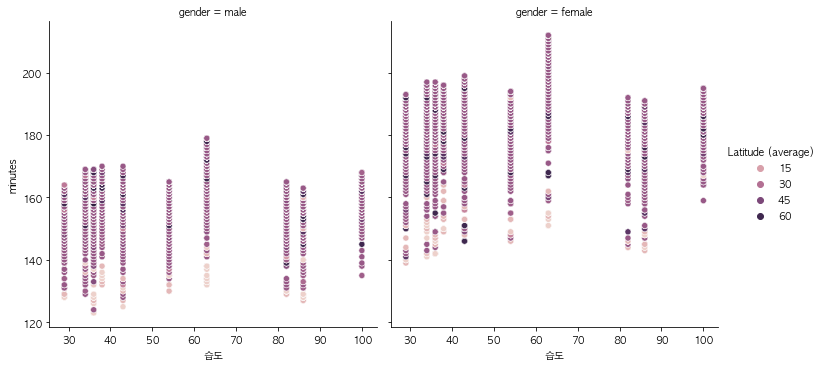

In [227]:
sns.relplot(x="습도", y="minutes", hue="Latitude (average)", col="gender", data=boston)
plt.show()

In [228]:
chicago['Latitude (average)'] = [abs(lat) for lat in chicago['Latitude (average)']]

In [229]:
chicago['finish'] = pd.to_datetime(chicago['finish'])

In [230]:
chicago['finish'] = [x.time() for x in chicago['finish'] ]

In [231]:
for i in range(len(chicago)):
    minute = chicago.loc[i, 'finish'].hour * 60 + chicago.loc[i, 'finish'].minute
    chicago.loc[i, 'finish'] = minute

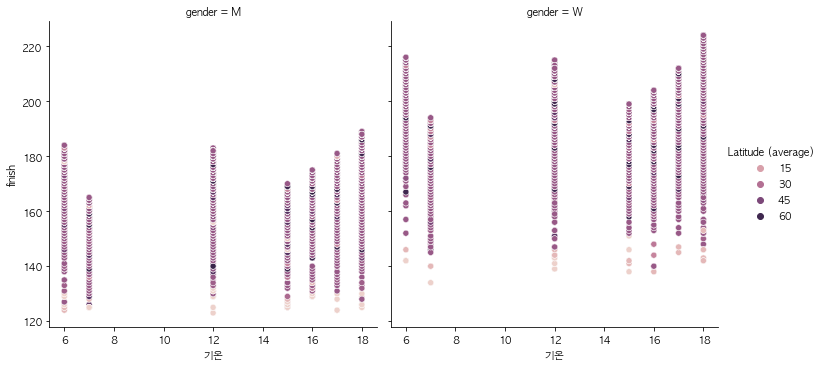

In [232]:
sns.relplot(x="기온", y="finish", hue="Latitude (average)", col="gender", data=chicago)
plt.show()

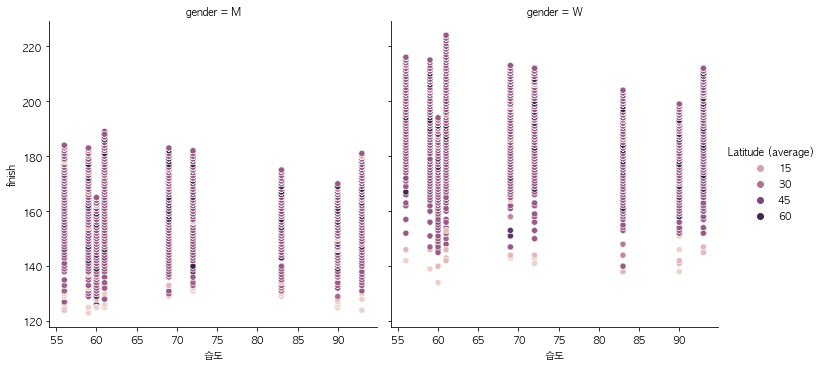

In [233]:
sns.relplot(x="습도", y="finish", hue="Latitude (average)", col="gender", data=chicago)
plt.show()